In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from allantools import oadev

pd.plotting.register_matplotlib_converters()

In [2]:
!ls iOS_noise_characterization

3-minute-100-Hz.csv
feb16_overnight.csv
my_iOS_device 200217 22_29_04_evening_characterization.csv
my_iOS_device 200218 07_41_58_caltrain.csv


In [3]:
raw_df = pd.read_csv('iOS_noise_characterization/my_iOS_device 200217 22_29_04_evening_characterization.csv', index_col=1).iloc[20:-20]

In [6]:
t = pd.to_datetime(raw_df['loggingTime(txt)']).values

In [7]:
accelX = raw_df['accelerometerAccelerationX(G)'].values
accelY = raw_df['accelerometerAccelerationY(G)'].values
accelZ = raw_df['accelerometerAccelerationZ(G)'].values

In [9]:
#plt.plot(raw_df['locationLongitude(WGS84)'], raw_df['locationLatitude(WGS84)'])

In [11]:
#plt.plot(raw_df['locationLongitude(WGS84)'])

In [12]:
#plt.plot(raw_df['locationLatitude(WGS84)'])

In [13]:
accelX = raw_df['accelerometerAccelerationX(G)'].values
accelY = raw_df['accelerometerAccelerationY(G)'].values
accelZ = raw_df['accelerometerAccelerationZ(G)'].values

In [14]:
gyroX = raw_df['gyroRotationX(rad/s)'].values
gyroY = raw_df['gyroRotationY(rad/s)'].values
gyroZ = raw_df['gyroRotationZ(rad/s)'].values

In [15]:
s = slice(1000, -3000)

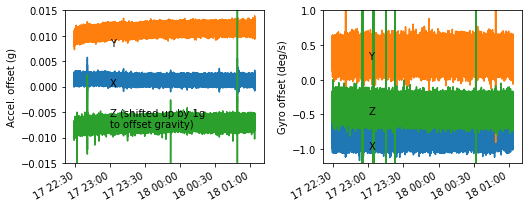

In [25]:
fig, (ax1, ax2) = plt.subplots(1,2, sharex=True, figsize=(7.5,3))

ax1.plot(t[s], accelX[s])
ax1.plot(t[s], accelY[s])
ax1.plot(t[s], accelZ[s] + 1)

from datetime import datetime

ax1.text(datetime(2020, 2, 18, 7), .00, 'X',)# color='tab:blue')
ax1.text(datetime(2020, 2, 18, 7), .008, 'Y',)# color='tab:orange')
ax1.text(datetime(2020, 2, 18, 7), -.008, 'Z (shifted up by 1g\nto offset gravity)',)# color='tab:green')

ax1.set_ylim(-.015, .015)
ax1.set_ylabel('Accel. offset (g)')

ax2.plot(t[s], gyroX[s] * 180 / np.pi)
ax2.plot(t[s], gyroY[s] * 180 / np.pi)
ax2.plot(t[s], gyroZ[s] * 180 / np.pi)

ax2.text(datetime(2020, 2, 18, 7), -1, 'X',)# color='tab:blue')
ax2.text(datetime(2020, 2, 18, 7), .3, 'Y',)# color='tab:orange')
ax2.text(datetime(2020, 2, 18, 7), -.5, 'Z',)# color='tab:green')

ax2.set_ylim(-1.2, 1)

ax2.set_ylabel('Gyro offset (deg/s)')

#ax2.set_xlabel('Time (Night of February 17-18)')

fig.autofmt_xdate()
fig.tight_layout()
plt.savefig('images/time-trace-characterization2.png', dpi=300, bbox_inches='tight')

In [17]:
tau_ax, dev_ax, _, _ = oadev(accelX[s], rate=100, data_type='freq')
tau_ay, dev_ay, _, _ = oadev(accelY[s], rate=100, data_type='freq')
tau_az, dev_az, _, _ = oadev(accelZ[s], rate=100, data_type='freq')

tau_gx, dev_gx, _, _ = oadev(gyroX[s], rate=100, data_type='freq')
tau_gy, dev_gy, _, _ = oadev(gyroY[s], rate=100, data_type='freq')
tau_gz, dev_gz, _, _ = oadev(gyroZ[s], rate=100, data_type='freq')


In [ ]:
np.savez('adev_params.npz',
    accelX=accelX,
         tau = tau_ax
         dev_ax=dev_ax,
         dev_ay=dev_ay,
         dev_az=dev_az,
         dev_gx=dev_gy,
         dev_gy=dev_gy,
         dev
         gyroX=gyroX,
         gyroY=gyroY,
         gyroZ=gyroZ
)

In [ ]:
plt.loglog(tau_ax, dev_ax)
plt.loglog(tau_ay, dev_ay)
plt.loglog(tau_az, dev_az)

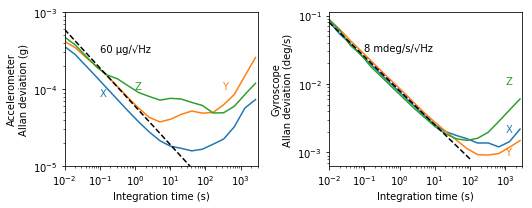

In [27]:
fig, (ax1, ax2) = plt.subplots(1,2, sharex=True, figsize=(7.5,3))

ax1.loglog(tau_ax, dev_ax)
ax1.loglog(tau_ay, dev_ay)
ax1.loglog(tau_az, dev_az)

ax2.loglog(tau_gx, dev_gx * 180 / np.pi)
ax2.loglog(tau_gy, dev_gy * 180 / np.pi)
ax2.loglog(tau_gz, dev_gz * 180 / np.pi)


ax1.text(.1, 8e-5, 'X', color='tab:blue')
ax1.text(3e2, 1e-4, 'Y', color='tab:orange')
ax1.text(1, 1e-4, 'Z', color='tab:green')

ax1.set_ylim(1e-5, 1e-3)

ax1.set_ylabel('Accelerometer\nAllan deviation (g)')
ax2.set_ylabel('Gyroscope\nAllan deviation (deg/s)')
ax2.set_xlim(1e-2, 3e3)
for axis in (ax1, ax2):
    axis.set_xlabel('Integration time (s)')

ax2.text(1e3, 2e-3, 'X', color='tab:blue')
ax2.text(1e3, .9e-3, 'Y', color='tab:orange')
ax2.text(1e3, 1e-2, 'Z', color='tab:green')

smooth_tau = np.array([1e-2, 1e2])

accel_rms = 6e-5
gyro_rms = 8e-3

ax2.loglog(smooth_tau, gyro_rms * smooth_tau**(-.5), color='black', ls='dashed')
ax1.loglog(smooth_tau, accel_rms * smooth_tau**(-.5), ls='dashed', color='black')
fig.tight_layout()
ax1.text(.1, 3e-4, '60 μg/√Hz', color='black')
ax2.text(.1, 3e-2, '8 mdeg/s/√Hz', color='black')
plt.savefig('images/allan-deviation2.png', dpi=300, bbox_inches='tight')